## Postprocessing XBeach 2D

Postprocessing 2D XBeach model output with the Python toolbox 

In [3]:
# import default modules
import matplotlib.pyplot as plt
import sys
import os

# method to import xbtools with try routine
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(os.path.abspath(os.path.join('..', '..', 'xbeach-toolbox')))

Import the toolbox and set the xbeach styleshoot for plotting

In [4]:
## import xbeach tools
#sys.path.append(os.path.abspath(os.path.join('..')))
from xbTools.xbeachpost import XBeachModelAnalysis

### Data
Specify path and load model from folder, in this example the xb-2D model prepared by the xbeach-setup-2D is used!

Please note that you should run this model before this script can be executed.

In [5]:
results = XBeachModelAnalysis('test_run_1', 'xb-2D\\')

### Get metadata from XBlog

In [6]:
results.metadata

{'wavemodel': 'surfbeat',
 'cyclic': '0 (no record found, default value used)',
 'swave': '1 (no record found, default value used)',
 'single_dir': '1 (no record found, default value used)',
 'lwave': '1 (no record found, default value used)',
 'flow': '1 (no record found, default value used)',
 'sedtrans': '1 (no record found, default value used)',
 'morphology': '0',
 'avalanching': '0 (no record found, default value used)',
 'gwflow': '0 (no record found, default value used)',
 'ships': '0 (no record found, default value used)',
 'vegetation': '0 (no record found, default value used)',
 'setbathy': '0 (no record found, default value used)',
 'viscosity': '1 (no record found, default value used)',
 'advection': '1 (no record found, default value used)',
 'wind': '0 (no record found, default value used)',
 'gridform': 'xbeach (no record found, default value used)',
 'xori': '.0000',
 'yori': '.0000',
 'alfa': '10.0000',
 'nx': '174',
 'ny': '180',
 'posdwn': '-1.0000',
 'depfile': 'be

### Additional settings
Not necessary

In [7]:
results.set_save_fig(False)

### Coordinate settings
Plot in local coords instead of global coords

In [8]:
results.set_plot_localcoords(False)

### Kilometer setting option
plot in kilometers instead of m

In [9]:
results.set_plot_km_coords(False)

### Set starttime
if not specified time from netcdf is used

In [8]:
#results.set_globalstarttime('2021-10-11T13:00:00')

### Change units
m to m+msl / NAP etc.

In [10]:
results.set_unitdict({'zb':['m+msl']}) 

### Load the xbeach model set-up

In [11]:
results.load_model_setup()

### Load XBeach model output

In [12]:
zs = results.load_modeloutput('zs')

ny, nx = results.var['globalx'].shape

results.load_modeloutput('point_zs')

zs = results.get_modeloutput('zs')
point_zs = results.get_modeloutput('point_zs')

[t, zs] = results.get_modeloutput_by_station('zs','point001')

#results.fig_check_tide_bc()

loading variable zs from file
loading variable point_zs from file


### Plotting 2D fields and 1D transects

loading variable zb from file
loading variable H from file


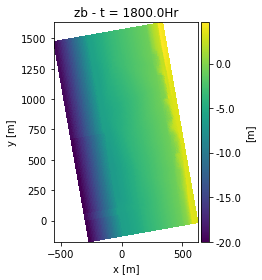

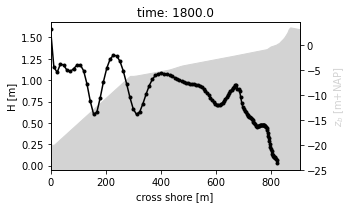

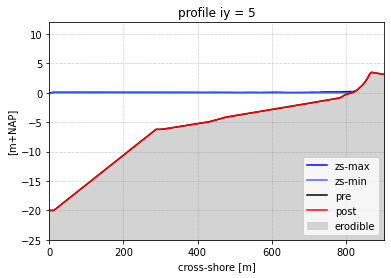

In [13]:
## change coordinates of plots to local coordinates:
#results.set_plot_localcoords(True)
## only plot a certain Area Of Interest of the complete grid
#results.set_aoi([20,445,20,220])

# example usage map plotting
fig, ax = results.fig_map_var('zb','[m]', it = 2)

#fig, ax = results.fig_map_diffvar('zb', '$\Delta z_b$ [m]')

fig, ax = results.fig_cross_var('H', 2, iy=5, coord=None, plot_ref_bathy=True, zmin=-25)

fig, ax = results.fig_profile_change(iy=5)

### Print params of xbeach run

In [14]:
results.params

{'wavemodel': 'surfbeat',
 'wbctype': 'jonstable',
 'vardx': 1.0,
 'posdwn': '-1',
 'nx': 174.0,
 'ny': 180.0,
 'xori': 0.0,
 'yori': 0.0,
 'alfa': 10.0,
 'xfile': 'x.grd',
 'yfile': 'y.grd',
 'depfile': 'bed.dep',
 'thetamin': '-90',
 'thetamax': 90.0,
 'thetanaut': 0.0,
 'dtheta': 10.0,
 'dtheta_s': 10.0,
 'Wavemodel': 'surfbeat',
 'morphology': 0.0,
 'tstop': 3600.0,
 'zs0': 0.0,
 'bcfile': 'jonstable.txt',
 'nglobalvar': 3.0,
 'npointvar': 2.0,
 'nmeanvar': 1.0,
 'npoints': 4.0,
 'globalvar': ['zb', 'zs', 'H'],
 'meanvar': ['zb'],
 'pointvar': ['zs', 'H'],
 'points': {'0': (6.0, 0.0), '': (12.0, 0.0)}}